In [1]:
import lxml.html
import requests as r
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
def get_star_rating(comment):
    star_rating = comment.find(xpath_stars).get('ck-stars').split()
    return int(star_rating[0])

In [4]:
def get_review_date(comment):
    review_date = comment.find(xpath_review_date).text
    review_date = dt.datetime.strptime(review_date,'%b %d, %Y').date()
    return review_date

In [5]:
def review_pages_count(company_name):
    url = base_url.format(company_name,1)
    page_to_scrape = r.get(url).text
    html = lxml.html.document_fromstring(page_to_scrape)
    review_pages = int(html.xpath(xpath_page_count)[1].text)
    return review_pages

In [6]:
def review_pages(company_name):
    review_pages = []
    for page in range(1,review_pages_count(company_name)+1):
        url = base_url.format(company_name,page)
        html = r.get(url).text.encode(encoding='utf-8')
        review_pages.append(html)
    return review_pages

In [7]:
def get_all_ratings(pages):
    """Returns ratins in a dataframe with the date as the index"""
    time_data = []
    for page in pages:
        html = lxml.html.document_fromstring(page)
        reviews = html.xpath(xpath_reviews)[0]
        comment_list = reviews.find_class('comment')
        for comment in comment_list:
            time_data.append((get_review_date(comment),get_star_rating(comment)))
    return time_data

In [8]:
def make_graph(company_name):
    pages = review_pages(company_name)
    td = get_all_ratings(pages)
    df = pd.DataFrame(td,columns=['Date','Stars']).set_index('Date')
    grouped = df.groupby([lambda x: x.year, lambda x: x.month])
    data = grouped.mean()
    ax = data.plot(grid=False,title= company_name.title() + ' Monthly Star Rating',figsize=(12,8))
    ax.set_xlabel('Month')
    ax.set_ylabel('Stars')
    ax.set_ylim(1,5)

In [9]:
base_url = 'https://www.creditkarma.com/reviews/personal-loan/single/id/{0}-personal-loans?pg={1}&pgsz=25'

In [10]:
xpath_page_count = '//*[@id="pagination"]/tr/td[3]/b[2]'
xpath_reviews = '//*[@id="commentlist"]'
xpath_stars = './/div[2]/div[1]/header/span'
xpath_review_date = './/div[1]/p'

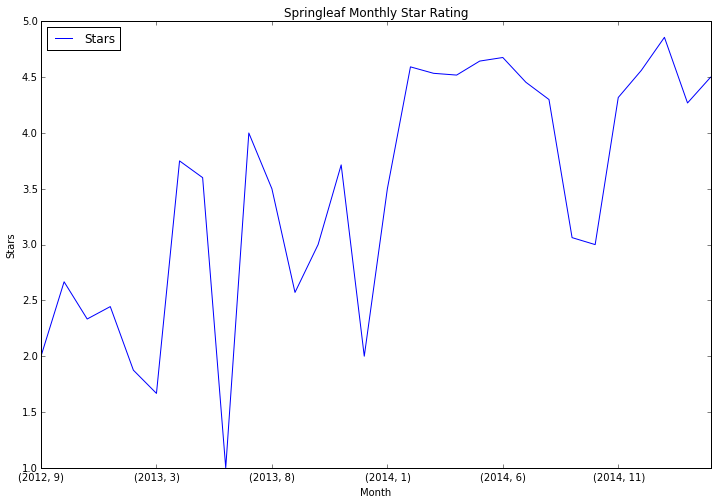

In [11]:
make_graph('springleaf')

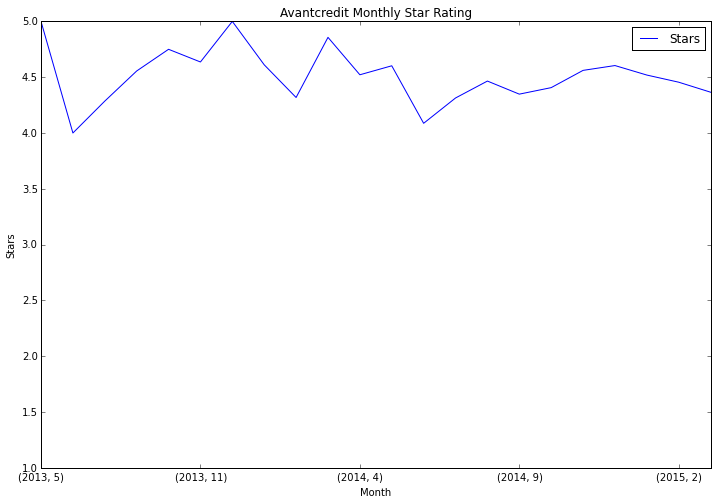

In [12]:
make_graph('avantcredit')

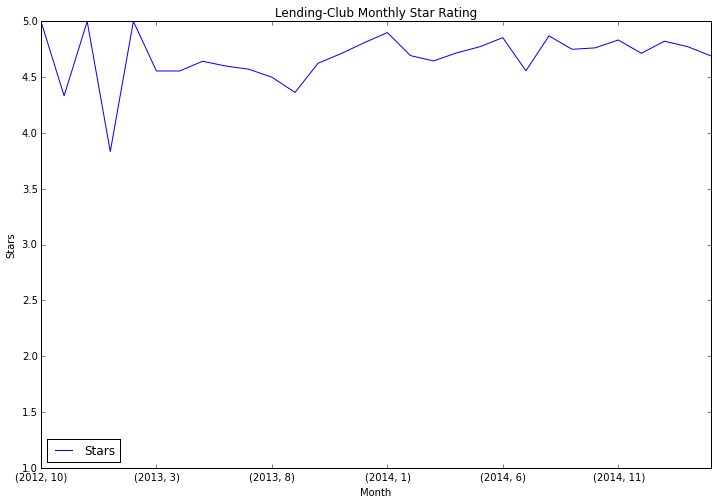

In [13]:
make_graph('lending-club')